<a href="https://colab.research.google.com/github/gian793/ML/blob/main/Projects/08%20-%20Wine%20Quality/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import files

In [18]:
import numpy as np
import matplotlib as plt
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# !!! ONLY for COLAB !!!! #

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  

Saving winequality-red.csv to winequality-red (2).csv
User uploaded file "winequality-red.csv" with length 85743 bytes


In [3]:
df  = pd.read_csv('winequality-red.csv', sep = ';')

tot_nan = df.isnull().sum()
print("Total invalid entries:" + str(tot_nan))

Total invalid entries:fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [4]:
# Split data

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)              # Drop all indexes used in df_train

print("Shape train data frame:" + str(df_train.shape))
print("Shape valid data frame:" + str(df_valid.shape))

Shape train data frame:(1119, 12)
Shape valid data frame:(480, 12)


In [5]:
# Create a list from existing data
col = list(df_train.columns)
print(col)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [6]:
max_ = df.max(axis=0)
min_ = df.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

In [7]:
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,0.548673,0.239726,0.43,0.082192,0.265442,0.366197,0.212014,0.596916,0.338583,0.257485,0.369231,0.6
1032,0.309735,0.479452,0.00,0.219178,0.138564,0.056338,0.028269,0.621880,0.488189,0.119760,0.184615,0.4
1002,0.398230,0.116438,0.33,0.078767,0.085142,0.169014,0.074205,0.373715,0.409449,0.305389,0.507692,0.8
487,0.495575,0.359589,0.36,0.061644,0.068447,0.056338,0.028269,0.596916,0.338583,0.053892,0.246154,0.6
979,0.672566,0.226027,0.49,0.034247,0.105175,0.028169,0.000000,0.501468,0.307087,0.179641,0.307692,0.4


In [9]:
df_valid.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
7,0.238938,0.363014,0.00,0.020548,0.088481,0.197183,0.053004,0.332599,0.511811,0.083832,0.246154,0.8
11,0.256637,0.260274,0.36,0.356164,0.098497,0.225352,0.339223,0.567548,0.480315,0.281437,0.323077,0.4
23,0.345133,0.253425,0.11,0.095890,0.120200,0.112676,0.215548,0.494126,0.338583,0.119760,0.153846,0.4


In [10]:
df_train_Y = df_train.quality
df_train_X = df_train.drop(['quality'], axis=1)

df_valid_Y = df_valid.quality
df_valid_X = df_valid.drop(['quality'], axis=1)

In [11]:
# Decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

my_model = DecisionTreeRegressor(max_leaf_nodes=12, random_state=1)

# Fit model
my_model.fit(df_train_X, df_train_Y)

# Predict
preds_val = my_model.predict(df_valid_X)

mae = mean_absolute_error(df_valid_Y, preds_val)
print(mae)

0.10428836441437973


In [14]:
pred = np.around(preds_val, decimals=1, out=None)

correct_cnt = sum(df_valid_Y == pred)
pred_perc = np.around(100*correct_cnt/len(df_valid_X), 1)

#print(correct_cnt)
print("Percentage correct: " + str(pred_perc)+str("%"))
#print(preds_val)

Percentage correct: 41.0%


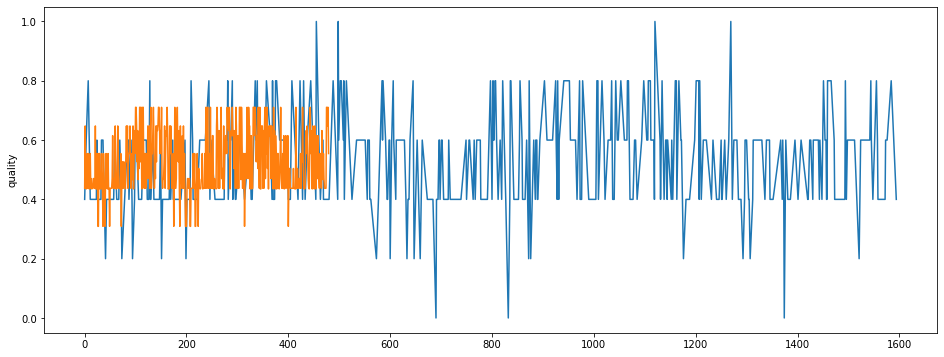

In [20]:
# Line plot
plt.figure(figsize=(16,6))
# Line chart
sns.lineplot(data=df_valid_Y)
sns.lineplot(data=preds_val)